**Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.
Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.**

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
url='https://drive.google.com/file/d/19FfTrGFiIb-Aw-8gNMiggCwLS_65EtpD/view?usp=share_link'
url='https://drive.google.com/uc?id='+url.split('/')[-2]
tele_df=pd.read_csv(url)

In [3]:
tele_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [5]:
tele_df.shape

(3333, 20)

**DATA of Top 5 ROWS**

In [8]:
tele_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**DATA of Last 5 Rows**

In [9]:
tele_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


**Info**

In [10]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**Area Code**

In [11]:
tele_df['Area code'].unique()

array([415, 408, 510])

**International plan VS Voice mail plan**

In [13]:
data_area_code=(tele_df['Area code'])
tele_df.loc[data_area_code,['International plan','Voice mail plan']]

,International plan,Voice mail plan
415,No,No
415,No,No
415,No,No
408,Yes,No
415,No,No
...,...,...
415,No,No
415,No,No
510,No,Yes
510,No,Yes


**Call details**

In [15]:
Call_details=tele_df.loc[data_area_code,['Total day calls','Total eve calls','Total night calls','Total intl calls','Customer service calls']]
Call_details

,Total day calls,Total eve calls,Total night calls,Total intl calls,Customer service calls
415,47,110,88,3,2
415,47,110,88,3,2
415,47,110,88,3,2
408,108,81,88,3,1
415,47,110,88,3,2
...,...,...,...,...,...
415,47,110,88,3,2
415,47,110,88,3,2
510,102,81,129,3,1
510,102,81,129,3,1


**Call details of Charge Data**

In [16]:
Call_details_charge=tele_df.loc[data_area_code,['Total day charge','Total eve charge','Total night charge','Total intl charge']]
Call_details

,Total day calls,Total eve calls,Total night calls,Total intl calls,Customer service calls
415,47,110,88,3,2
415,47,110,88,3,2
415,47,110,88,3,2
408,108,81,88,3,1
415,47,110,88,3,2
...,...,...,...,...,...
415,47,110,88,3,2
415,47,110,88,3,2
510,102,81,129,3,1
510,102,81,129,3,1


**Duplicate State Data**

In [17]:
Duplicate_state=(tele_df['State'].duplicated())
tele_df[Duplicate_state]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
14,IA,62,415,No,No,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,False
24,VA,132,510,No,No,0,81.1,86,13.79,245.2,72,20.84,237.0,115,10.67,10.3,2,2.78,0,False
27,MT,54,408,No,No,0,134.3,73,22.83,155.5,100,13.22,102.1,68,4.59,14.7,4,3.97,3,False
28,MO,20,415,No,No,0,190.0,109,32.30,258.2,84,21.95,181.5,102,8.17,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


**CHURN DATA REPRESENTATION**

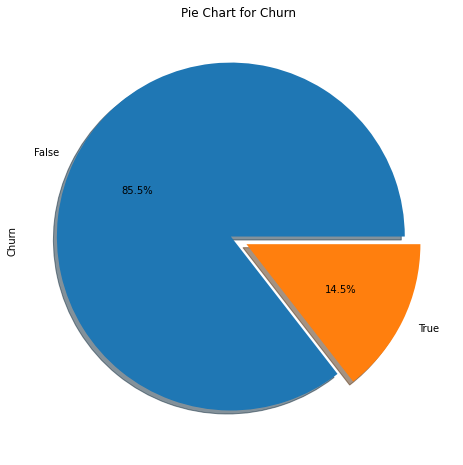

In [18]:
tele_df ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=0,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

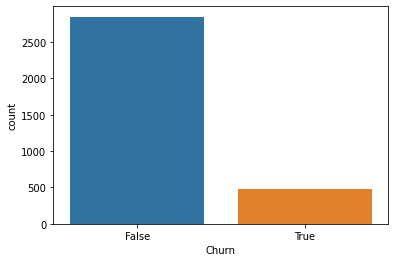

In [19]:
sns.countplot(x=tele_df.Churn)

**State by Churn Record**

In [20]:
tele_df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

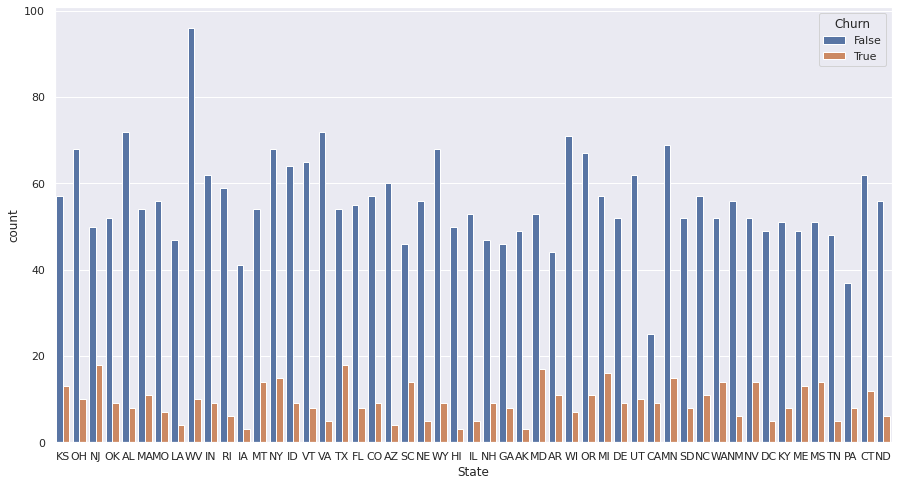

In [21]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,8))
ax=sns.countplot(x='State',hue='Churn',data=tele_df)
plt.show()

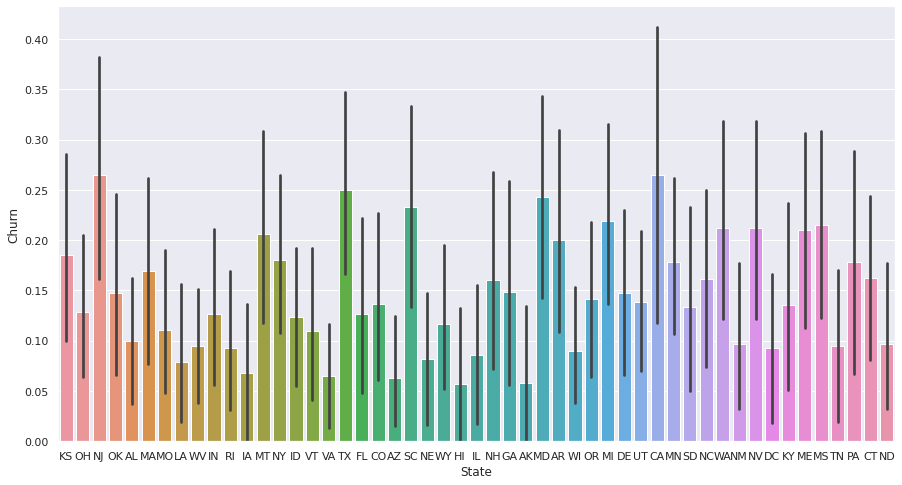

In [22]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,8))
ax=sns.barplot(x='State',y='Churn',data=tele_df)
plt.show()

**Churn % with State**

Text(0, 0.5, 'percentage')

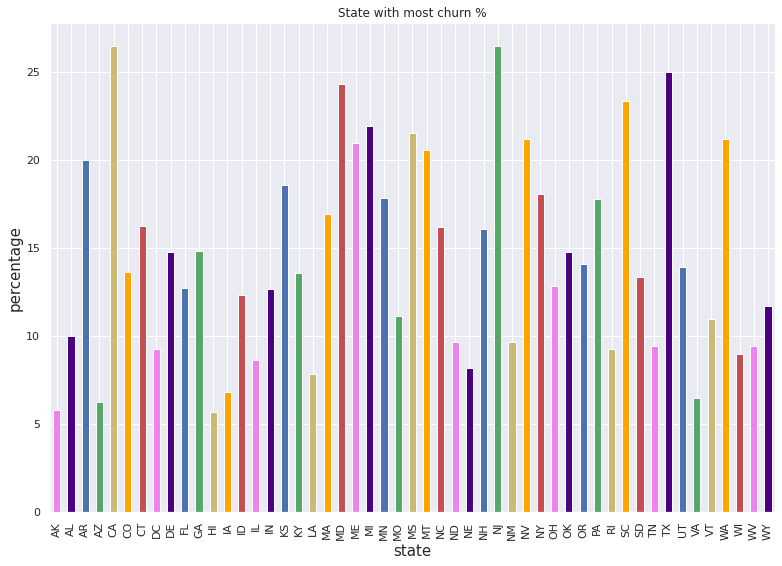

In [23]:
plt.rcParams['figure.figsize']=(13,9)

((tele_df.groupby(['State'])['Churn'].mean())*100).plot.bar(color=['violet','indigo','b','g','y','orange','r'])
# plt.figure(figsize=(35,18))
plt.title("State with most churn %")
plt.xlabel('state',fontsize=15)
plt.ylabel('percentage',fontsize=15)

**Show most churn State Data**

In [24]:
tele_df.groupby(['State'])['Churn'].mean().sort_values(ascending=False).head()

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
Name: Churn, dtype: float64

**Show minimum churn data**

In [25]:
tele_df.groupby(['State'])['Churn'].mean().sort_values(ascending=True).head()

State
HI    0.056604
AK    0.057692
AZ    0.062500
VA    0.064935
IA    0.068182
Name: Churn, dtype: float64

**Area Code with Churn %**

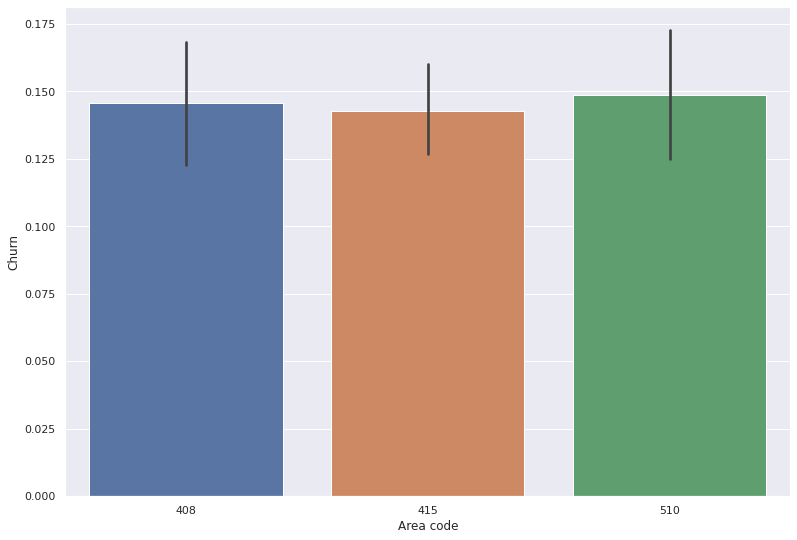

In [26]:
Area_code=tele_df['Area code'],tele_df['Churn']
sns.set(style='darkgrid')
# plt.figure(figsize=(11,8))
ax=sns.barplot(x='Area code',y='Churn',data=tele_df)
plt.show()

**Customer service calls with Area Code**

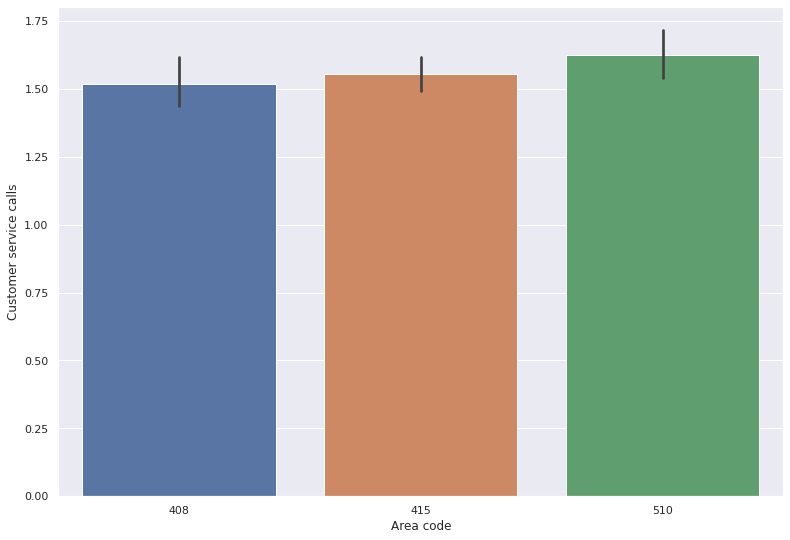

In [27]:
Customer_Service=tele_df['Area code'],tele_df['Customer service calls']
sns.set(style='darkgrid')
# plt.figure(figsize=(11,8))
ax=sns.barplot(x='Area code',y='Customer service calls',data=tele_df)
plt.show()

**Analysing International plan**

In [28]:
tele_df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

**International plan vs churn**

In [29]:
International_plan_data=pd.crosstab(tele_df['International plan'],tele_df['Churn'])
International_plan_data

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


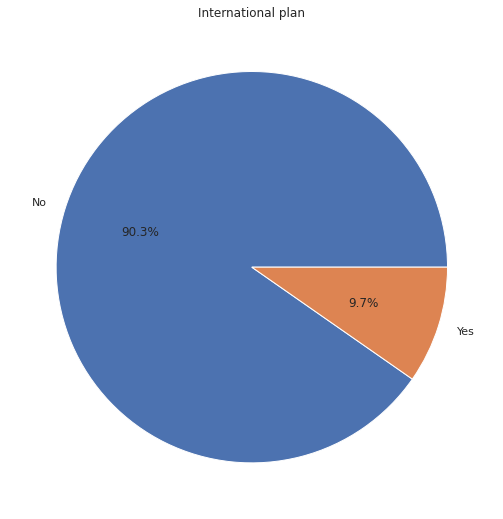

In [30]:
data=tele_df['International plan'].value_counts()
plt.pie(data,autopct='%1.1f%%',labels=['No','Yes'])
plt.title("International plan")
plt.show()

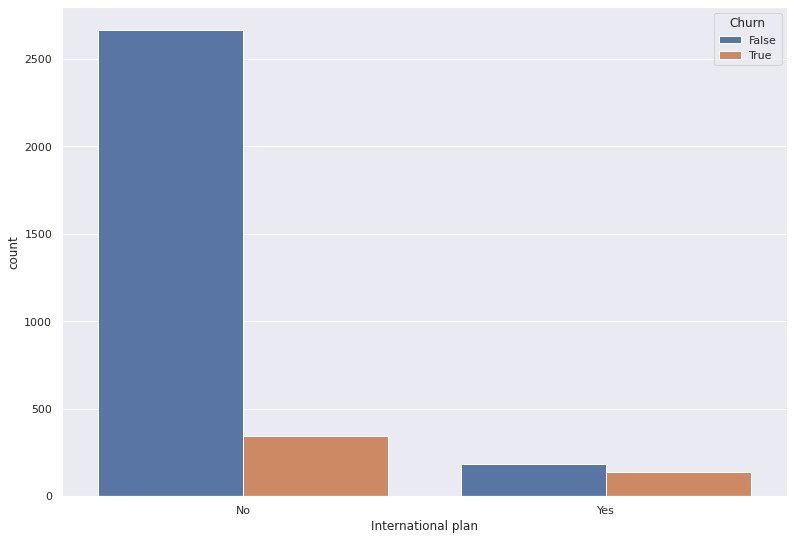

In [31]:
sns.countplot(x='International plan',hue="Churn",data=tele_df)


**International plan with respect to Churn**

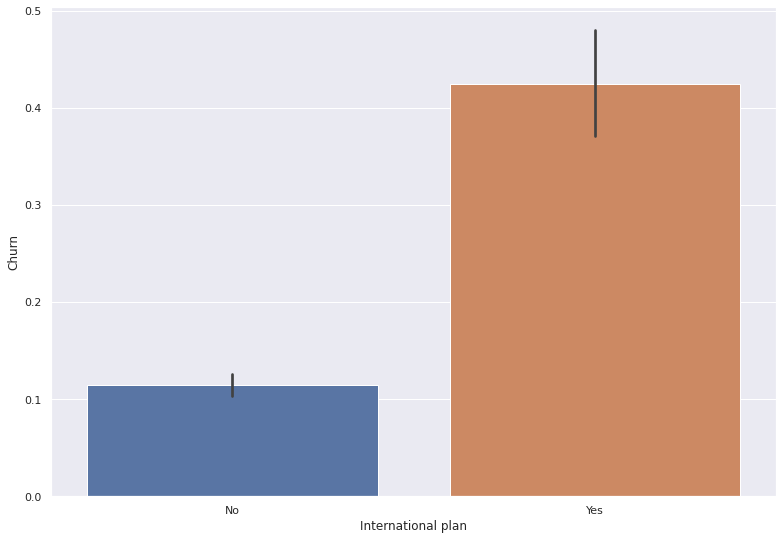

In [32]:
plan=tele_df['International plan'],tele_df['Churn']
sns.set(style='darkgrid')
# plt.figure(figsize=(11,8))
ax=sns.barplot(x='International plan',y='Churn',data=tele_df)
plt.show()

**International plan with respect to Area Code**

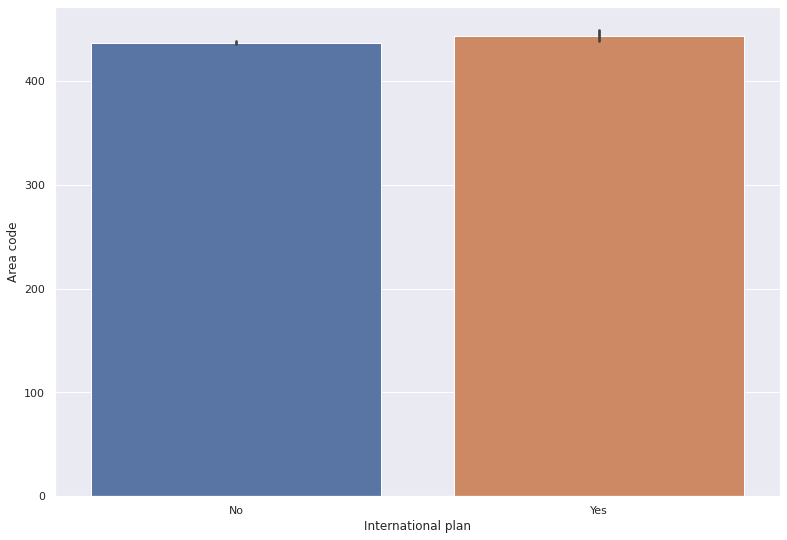

In [33]:
plan=tele_df['International plan'],tele_df['Area code']
sns.set(style='darkgrid')
# plt.figure(figsize=(11,8))
ax=sns.barplot(x='International plan',y='Area code',data=tele_df)
plt.show()

**Analysis Voice Mail**

In [35]:
voice_mail=tele_df['Voice mail plan'].value_counts()
voice_mail

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

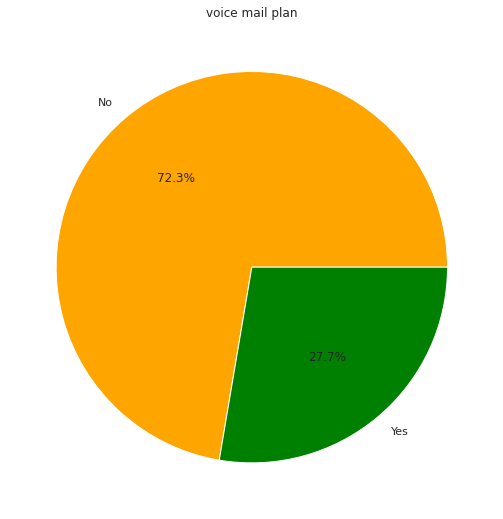

In [36]:
plt.pie(voice_mail,autopct='%1.1f%%',labels=['No','Yes'],colors=['orange','green'])
plt.title("voice mail plan")
plt.show()

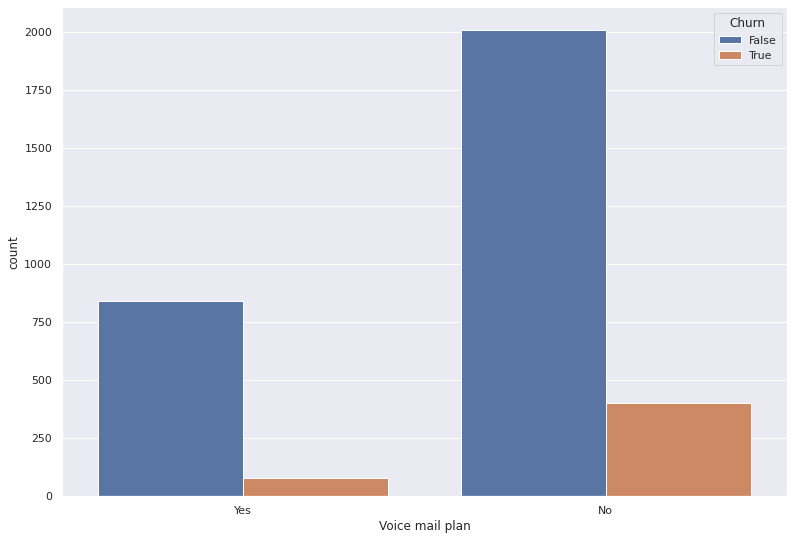

In [37]:
sns.countplot(x='Voice mail plan',hue='Churn',data=tele_df)


**Number vmail messages**

In [38]:
# Table cross wise data of vmail and churn
Vmail=pd.crosstab(tele_df['Number vmail messages'],tele_df['Churn'])
Vmail

Churn,False,True
Number vmail messages,,
0,2008,403
4,1,0
8,2,0
9,2,0
10,1,0
11,2,0
12,6,0
13,4,0
14,7,0


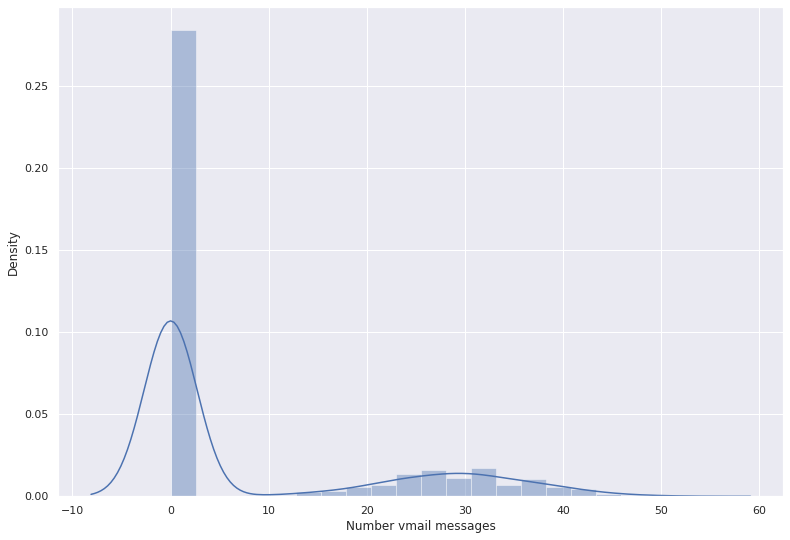

In [39]:
sns.distplot(tele_df['Number vmail messages'])


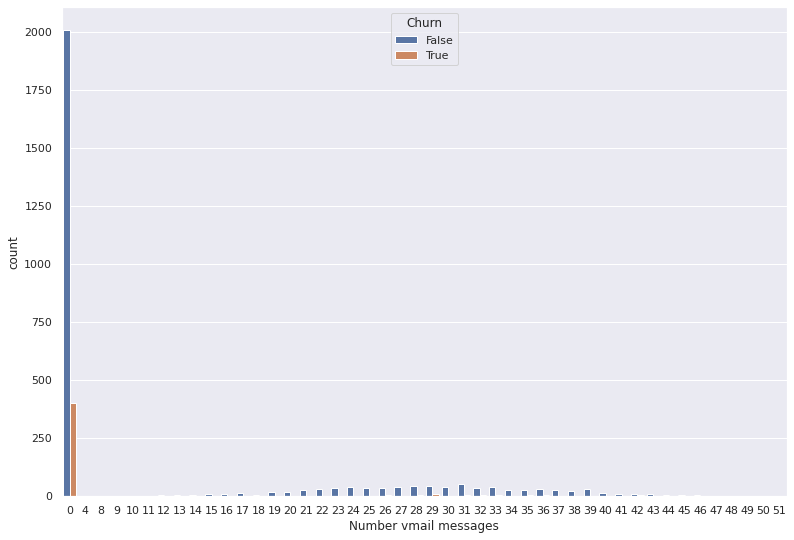

In [40]:
sns.countplot(x='Number vmail messages',hue='Churn',data=tele_df)


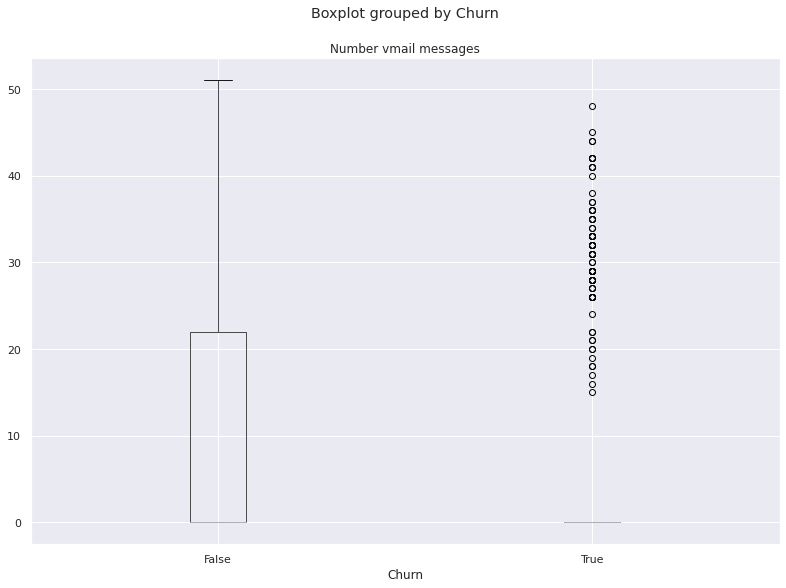

In [41]:
tele_df.boxplot(column='Number vmail messages', by='Churn')

**Analyzing "Customer service calls" column**

In [42]:
customer_ser_call=pd.crosstab(tele_df['Customer service calls'],tele_df['Churn'])
customer_ser_call

Churn,False,True
Customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


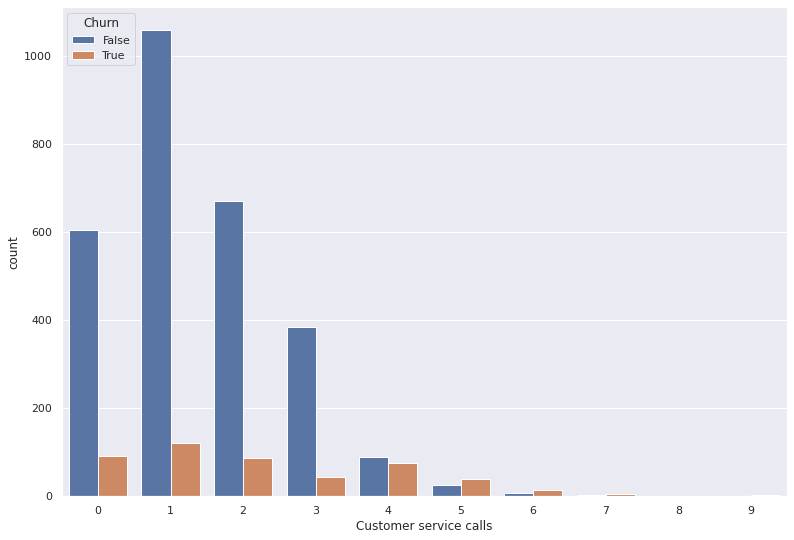

In [43]:
sns.countplot(x='Customer service calls',hue='Churn',data=tele_df)


**Analysis Day Call**

In [44]:
# mean value of churned and not churned customer 
(tele_df.groupby(["Churn"])['Total day calls'].mean())


Churn
False    100.283158
True     101.335404
Name: Total day calls, dtype: float64

In [45]:
#Print the mean value of churned and not churned customer 
(tele_df.groupby(["Churn"])['Total day minutes'].mean())

Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64

In [46]:
#Print the mean value of churned and not churned customer 
(tele_df.groupby(["Churn"])['Total day charge'].mean())


Churn
False    29.780421
True     35.175921
Name: Total day charge, dtype: float64

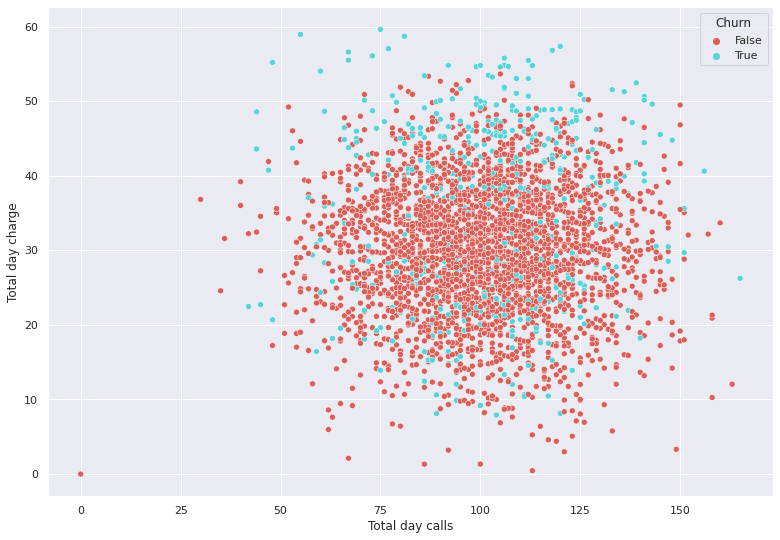

In [47]:
sns.scatterplot(x="Total day calls", y="Total day charge", hue="Churn", data=tele_df,palette='hls')


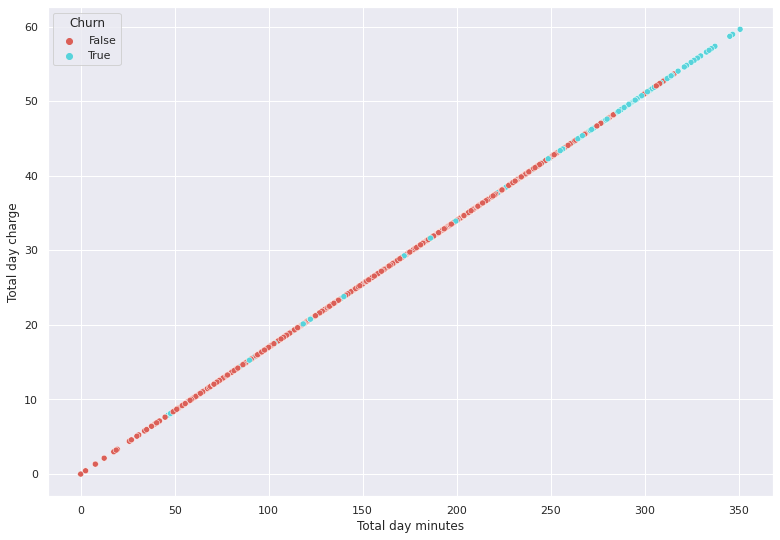

In [48]:
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=tele_df,palette='hls')


**Analysis eve calls**

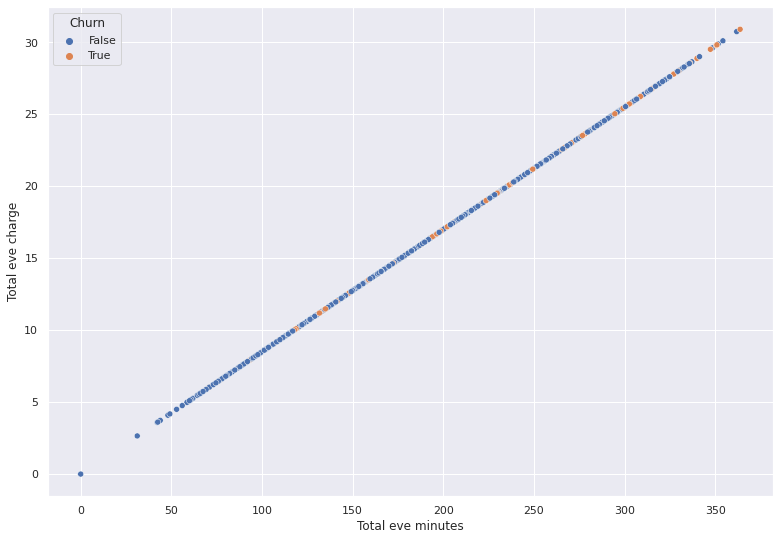

In [49]:
sns.scatterplot(x="Total eve minutes",y="Total eve charge",hue="Churn",data=tele_df)

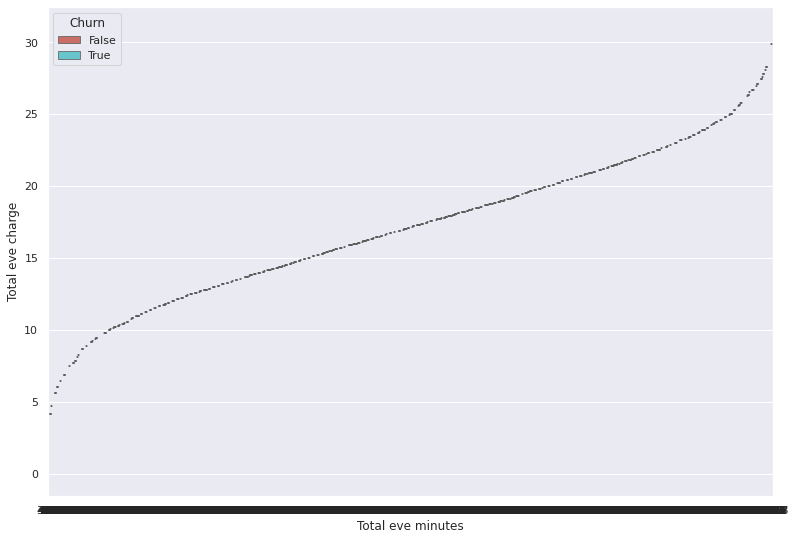

In [50]:
sns.boxplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=tele_df,palette='hls')


**Analysis night calls**

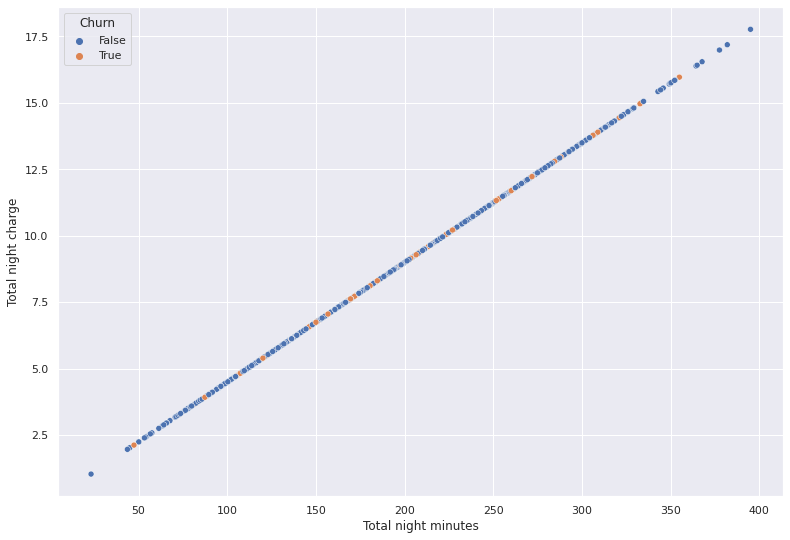

In [51]:
sns.scatterplot(x="Total night minutes",y="Total night charge",hue="Churn",data=tele_df)

**Analysis Int1 calls**

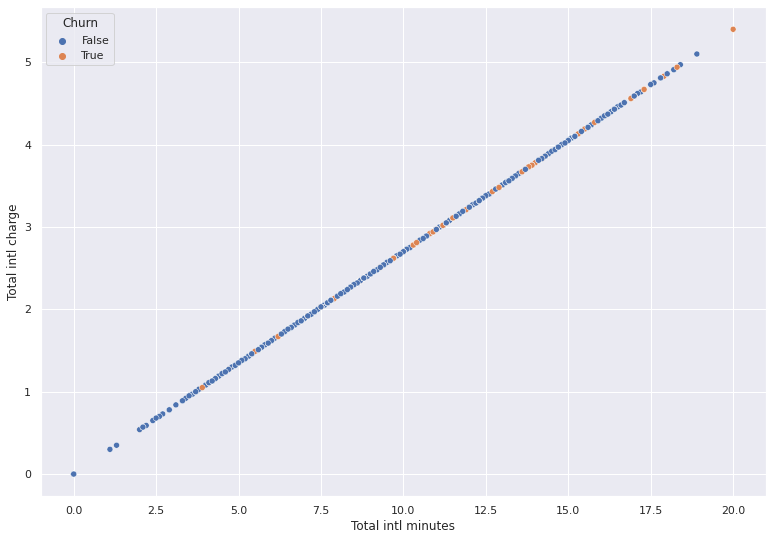

In [52]:
sns.scatterplot(x="Total intl minutes",y="Total intl charge",hue="Churn",data=tele_df)

In [53]:
#Deriving a relation between overall call charge and overall call minutes   
day_charge_perm = tele_df['Total day charge'].mean()/tele_df['Total day minutes'].mean()
eve_charge_perm = tele_df['Total eve charge'].mean()/tele_df['Total eve minutes'].mean()
night_charge_perm = tele_df['Total night charge'].mean()/tele_df['Total night minutes'].mean()
int_charge_perm= tele_df['Total intl charge'].mean()/tele_df['Total intl minutes'].mean()

**Graphical represnatation of each numerical column present in the data set excluded boolean and obj**

In [54]:
df1=tele_df.select_dtypes(exclude=['object','bool'])
df1


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


<Figure size 1224x72 with 0 Axes>

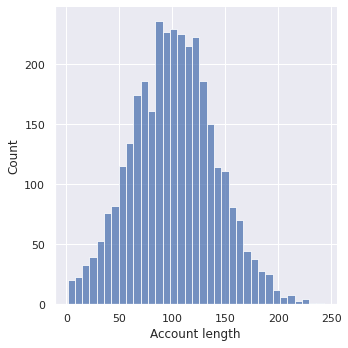

<Figure size 1224x72 with 0 Axes>

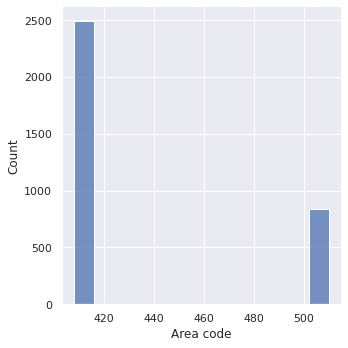

<Figure size 1224x72 with 0 Axes>

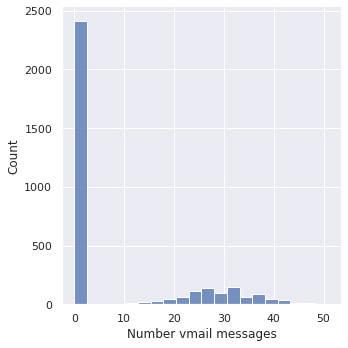

<Figure size 1224x72 with 0 Axes>

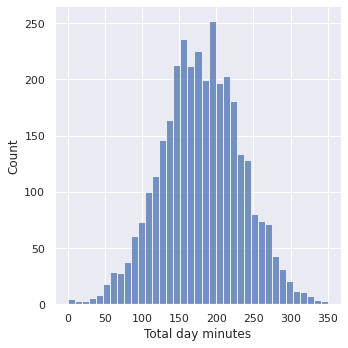

<Figure size 1224x72 with 0 Axes>

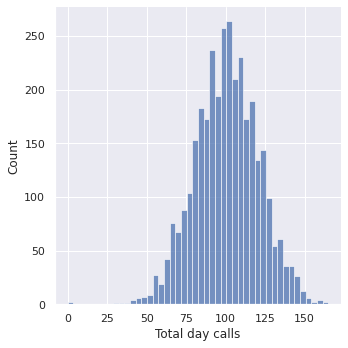

<Figure size 1224x72 with 0 Axes>

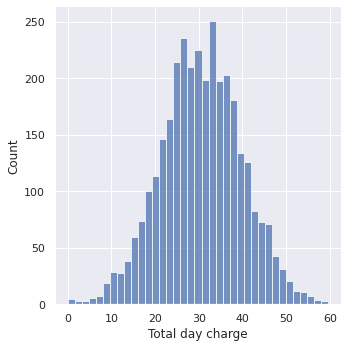

<Figure size 1224x72 with 0 Axes>

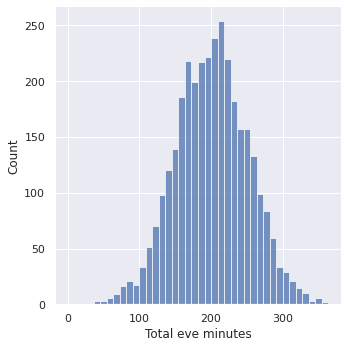

<Figure size 1224x72 with 0 Axes>

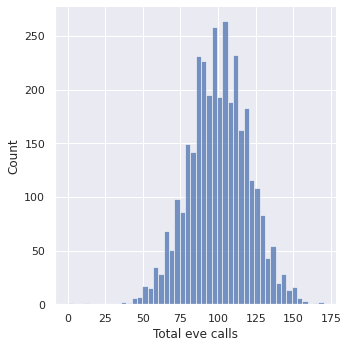

<Figure size 1224x72 with 0 Axes>

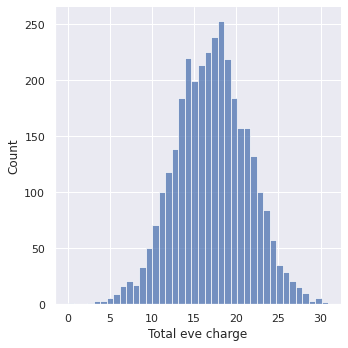

<Figure size 1224x72 with 0 Axes>

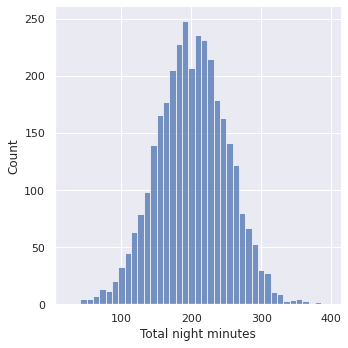

<Figure size 1224x72 with 0 Axes>

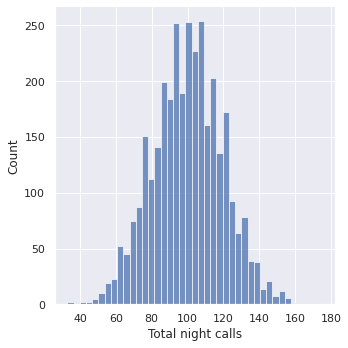

<Figure size 1224x72 with 0 Axes>

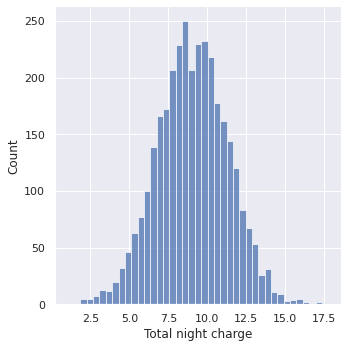

<Figure size 1224x72 with 0 Axes>

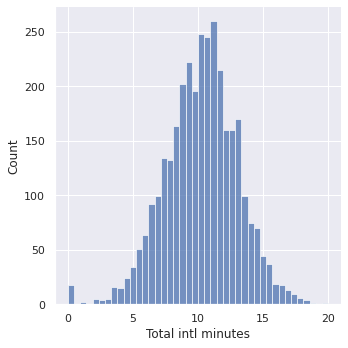

<Figure size 1224x72 with 0 Axes>

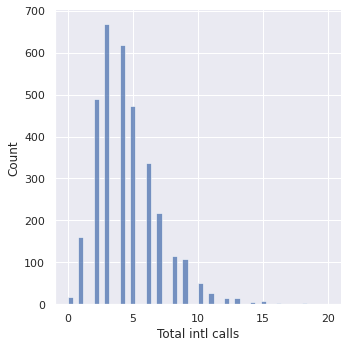

<Figure size 1224x72 with 0 Axes>

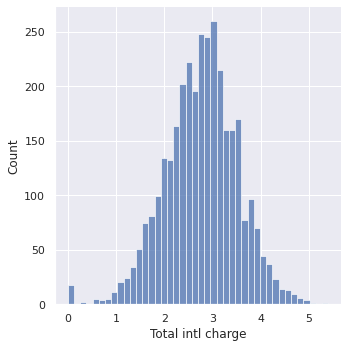

<Figure size 1224x72 with 0 Axes>

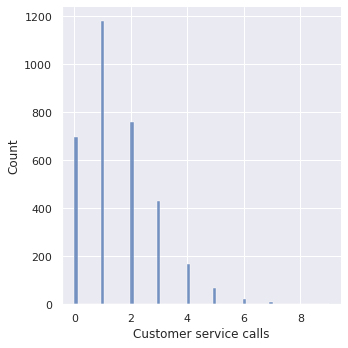

In [55]:
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column)
plt.show()

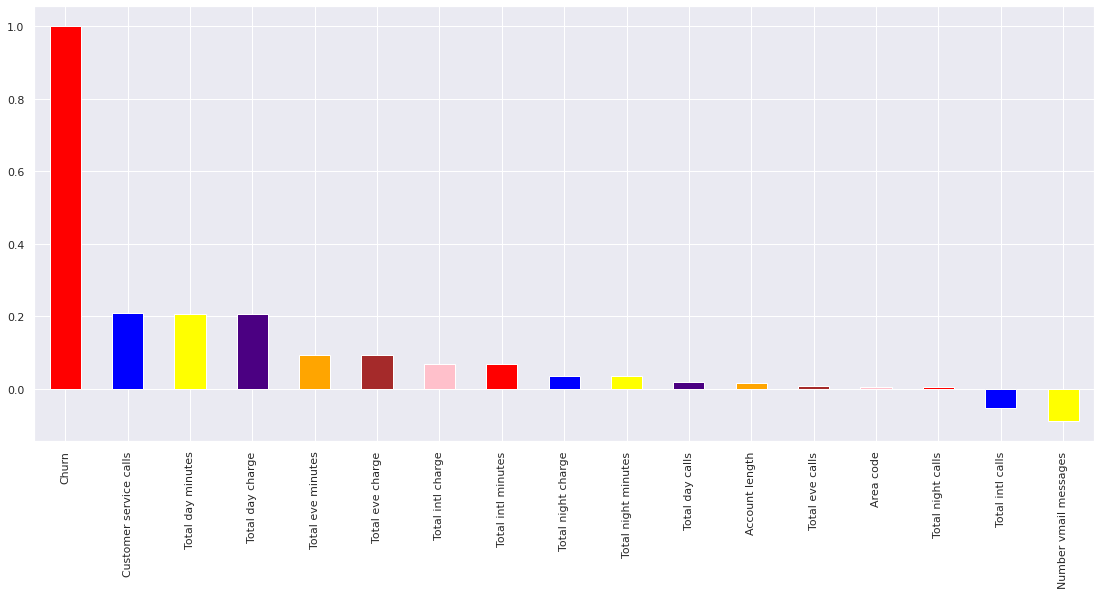

In [56]:
# visualization using correlation plot
plt.figure(figsize=(19,8))
tele_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color = ['red','blue','yellow','indigo','orange','brown','pink'])


Text(0.5, 1.0, 'Correlation Heatmap')

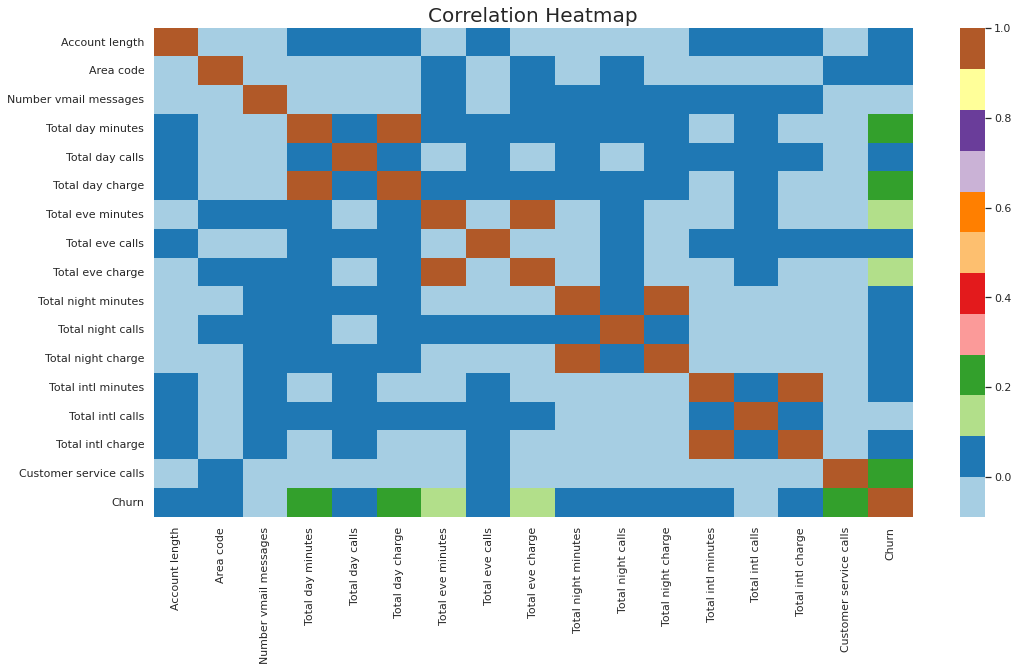

In [57]:
tele_df['Churn'] = tele_df['Churn'].replace({bool(True):1,bool(False):0})
plt.figure(figsize=(17,9))
sns.heatmap(tele_df.corr(), cmap="Paired",annot=False)
plt.title("Correlation Heatmap", fontsize=20)